In [ ]:
# JEE Cutoff Prediction Model
## Phase 1: Data Loading and Cleaning

# **Objective**: Predict next year's JEE Main cutoffs using historical data (2018-2024)

# **Approach**: Single XGBoost model using only final round (Round 7) closing ranks

# **Course Alignment**: 
# - Unit 3: Data Preprocessing
# - Unit 4: Regression
# - Unit 5: Ensemble Learning (XGBoost)

Hello, World!


## Step 0: Install Required Libraries

Run this cell first to install all necessary packages.

In [2]:
# Install required libraries
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn -q

print("✅ All libraries installed successfully!")


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
✅ All libraries installed successfully!
✅ All libraries installed successfully!


## Step 1: Import Libraries

Import all necessary libraries for data processing, modeling, and visualization.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Step 2: Load the Dataset

Load the JoSAA cutoffs data from the CSV file.

In [8]:
# Load the dataset
df_raw = pd.read_csv('josaa_cutoffs_pivoted_by_rounds.csv')

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df_raw.shape[0]} rows × {df_raw.shape[1]} columns")
print(f"📅 Years covered: {df_raw['year'].min()} to {df_raw['year'].max()}")
print(f"\nFirst few rows:")
df_raw.head()

✅ Dataset loaded successfully!
📊 Shape: 79521 rows × 20 columns
📅 Years covered: 2018 to 2025

First few rows:


,year,institute,program_name,quota,seat_type,gender,round_1_opening,round_1_closing,round_2_opening,round_2_closing,round_3_opening,round_3_closing,round_4_opening,round_4_closing,round_5_opening,round_5_closing,round_6_opening,round_6_closing,round_7_opening,round_7_closing
0,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OBC-NCL,Female-only (including Supernumerary),15996.0,15996.0,16302.0,16302.0,17586.0,17586.0,18349.0,18349.0,18615.0,18615.0,19266.0,19266.0,20319.0,20319.0
1,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OBC-NCL,Gender-Neutral,10207.0,11151.0,12456.0,13784.0,13406.0,14868.0,13784.0,15883.0,14868.0,16623.0,14868.0,16711.0,15903.0,17411.0
2,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OPEN,Female-only (including Supernumerary),27789.0,32674.0,45443.0,47475.0,50877.0,50950.0,51019.0,51118.0,53268.0,54981.0,54981.0,55078.0,54981.0,56345.0
3,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OPEN,Gender-Neutral,38360.0,40468.0,40411.0,46261.0,41030.0,49114.0,41030.0,51326.0,41030.0,54095.0,44634.0,55991.0,44634.0,57812.0
4,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OPEN (PwD),Gender-Neutral,1264.0,1264.0,2866.0,2866.0,2247.0,2247.0,2247.0,2247.0,2247.0,2247.0,2247.0,2247.0,NaN,NaN


## Step 3: Initial Data Exploration

Understand the structure and contents of our dataset.

In [9]:
# Check data types and missing values
print("📋 Column Information:")
print("=" * 80)
df_raw.info()

print("\n" + "=" * 80)
print("📊 Dataset Statistics:")
print("=" * 80)
print(f"Total number of unique institutes: {df_raw['institute'].nunique()}")
print(f"Total number of unique programs: {df_raw['program_name'].nunique()}")
print(f"Quotas available: {df_raw['quota'].unique()}")
print(f"Seat types available: {df_raw['seat_type'].unique()}")
print(f"Gender categories: {df_raw['gender'].unique()}")

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79521 entries, 0 to 79520
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             79521 non-null  int64  
 1   institute        79521 non-null  object 
 2   program_name     79521 non-null  object 
 3   quota            79521 non-null  object 
 4   seat_type        79521 non-null  object 
 5   gender           79521 non-null  object 
 6   round_1_opening  79509 non-null  float64
 7   round_1_closing  79509 non-null  float64
 8   round_2_opening  77513 non-null  float64
 9   round_2_closing  77513 non-null  float64
 10  round_3_opening  76928 non-null  float64
 11  round_3_closing  76928 non-null  float64
 12  round_4_opening  76764 non-null  float64
 13  round_4_closing  76764 non-null  float64
 14  round_5_opening  76682 non-null  float64
 15  round_5_closing  76682 non-null  float64
 16  round_6_opening  65250 non-null  flo

## Step 4: Analyze Missing Values

Check which rounds have missing data and understand the pattern.

📊 Missing Values Analysis:
         Column  Missing Count  Missing %
round_1_opening             12       0.02
round_1_closing             12       0.02
round_2_opening           2008       2.53
round_2_closing           2008       2.53
round_3_opening           2593       3.26
round_3_closing           2593       3.26
round_4_opening           2757       3.47
round_4_closing           2757       3.47
round_5_opening           2839       3.57
round_5_closing           2839       3.57
round_6_opening          14271      17.95
round_6_closing          14271      17.95
round_7_opening          64558      81.18
round_7_closing          64558      81.18


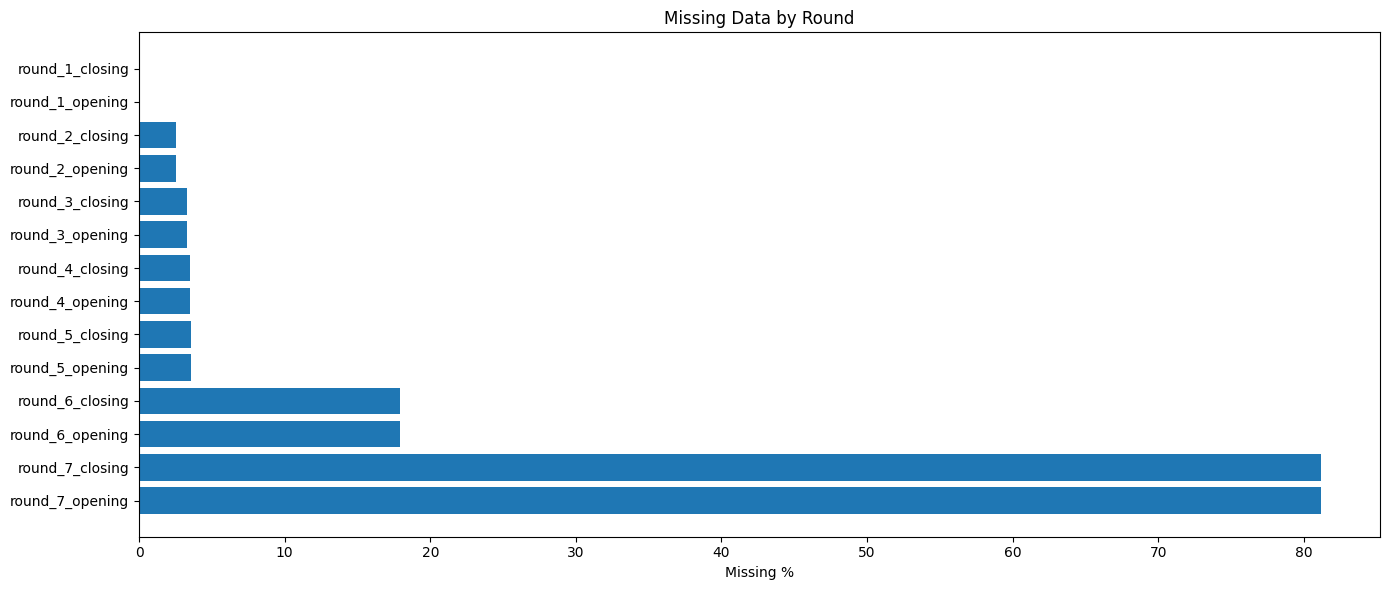

In [10]:
# Check missing values in round columns
round_cols = [col for col in df_raw.columns if 'round' in col.lower()]

missing_summary = df_raw[round_cols].isnull().sum()
missing_pct = (df_raw[round_cols].isnull().sum() / len(df_raw) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing_summary.index,
    'Missing Count': missing_summary.values,
    'Missing %': missing_pct.values
})

print("📊 Missing Values Analysis:")
print("=" * 80)
print(missing_df.to_string(index=False))

# Visualize missing data pattern
plt.figure(figsize=(14, 6))
missing_df_sorted = missing_df.sort_values('Missing %', ascending=False)
plt.barh(missing_df_sorted['Column'], missing_df_sorted['Missing %'])
plt.xlabel('Missing %')
plt.title('Missing Data by Round')
plt.tight_layout()
plt.show()

## Step 5: Identify and Extract Last Round Closing Ranks

Different years have different number of rounds:
- 2018, 2019: 7 rounds
- 2020, 2021, 2022, 2023: 6 rounds  
- 2024: 5 rounds
- 2025: 6 rounds

We'll dynamically find the last available round for each row and extract its closing rank.

In [11]:
# Function to get the last round closing rank for each row
def get_last_round_closing(row):
    """
    Dynamically find the last available round's closing rank for a given row.
    Checks from round 7 down to round 1 and returns the first non-null closing value.
    """
    # Check rounds from 7 to 1 (highest to lowest)
    for round_num in range(7, 0, -1):
        closing_col = f'round_{round_num}_closing'
        if closing_col in row.index and pd.notna(row[closing_col]):
            return row[closing_col]
    return None

# Apply the function to get last round closing for each row
print("🔄 Extracting last round closing rank for each entry...")
df_raw['last_round_closing'] = df_raw.apply(get_last_round_closing, axis=1)

print("✅ Last round closing ranks extracted successfully!")

# Check how many rounds were actually used per year
print("\n📊 Checking which rounds were used as 'last round' by year:")
print("=" * 80)

for year in sorted(df_raw['year'].unique()):
    year_data = df_raw[df_raw['year'] == year]
    
    # Find which round columns have data for this year
    round_closing_cols = [col for col in df_raw.columns if col.startswith('round_') and col.endswith('_closing')]
    
    # Count non-null values in each round for this year
    available_rounds = []
    for col in round_closing_cols:
        if year_data[col].notna().sum() > 0:
            round_num = col.replace('round_', '').replace('_closing', '')
            available_rounds.append(int(round_num))
    
    max_round = max(available_rounds) if available_rounds else 0
    print(f"Year {year}: Maximum round = {max_round}")

# Select only necessary columns
columns_to_keep = [
    'year',
    'institute',
    'program_name',
    'quota',
    'seat_type',
    'gender',
    'last_round_closing'  # Dynamically extracted last round closing rank
]

df_cleaned = df_raw[columns_to_keep].copy()

print("\n✅ Extracted last round data for all years")
print(f"📊 New shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print(f"\nColumns retained: {list(df_cleaned.columns)}")
print(f"\nFirst few rows:")
df_cleaned.head(10)

🔄 Extracting last round closing rank for each entry...
✅ Last round closing ranks extracted successfully!

📊 Checking which rounds were used as 'last round' by year:
Year 2018: Maximum round = 7
Year 2019: Maximum round = 7
Year 2020: Maximum round = 6
Year 2021: Maximum round = 6
Year 2022: Maximum round = 6
Year 2023: Maximum round = 6
Year 2024: Maximum round = 5
Year 2025: Maximum round = 6

✅ Extracted last round data for all years
📊 New shape: 79521 rows × 7 columns

Columns retained: ['year', 'institute', 'program_name', 'quota', 'seat_type', 'gender', 'last_round_closing']

First few rows:
✅ Last round closing ranks extracted successfully!

📊 Checking which rounds were used as 'last round' by year:
Year 2018: Maximum round = 7
Year 2019: Maximum round = 7
Year 2020: Maximum round = 6
Year 2021: Maximum round = 6
Year 2022: Maximum round = 6
Year 2023: Maximum round = 6
Year 2024: Maximum round = 5
Year 2025: Maximum round = 6

✅ Extracted last round data for all years
📊 New sha

,year,institute,program_name,quota,seat_type,gender,last_round_closing
0,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OBC-NCL,Female-only (including Supernumerary),20319.0
1,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OBC-NCL,Gender-Neutral,17411.0
2,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OPEN,Female-only (including Supernumerary),56345.0
3,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OPEN,Gender-Neutral,57812.0
4,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,OPEN (PwD),Gender-Neutral,2247.0
5,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,SC,Gender-Neutral,10992.0
6,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",AI,ST,Gender-Neutral,5176.0
7,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",HS,OBC-NCL,Female-only (including Supernumerary),390915.0
8,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",HS,OBC-NCL,Gender-Neutral,193316.0
9,2018,"Assam University, Silchar","Agricultural Engineering (4 Years, Bachelor of...",HS,OPEN,Female-only (including Supernumerary),365089.0


## Step 6: Handle Missing Values in Last Round

Check and handle missing values in the dynamically extracted last round closing ranks.

In [12]:
# Check missing values in last_round_closing
print("📊 Missing Values in Last Round Closing Rank:")
print("=" * 80)
print(f"Total missing values: {df_cleaned['last_round_closing'].isnull().sum()}")
print(f"Percentage missing: {(df_cleaned['last_round_closing'].isnull().sum() / len(df_cleaned) * 100):.2f}%")

# Show some examples of missing data
if df_cleaned['last_round_closing'].isnull().sum() > 0:
    print(f"\n📋 Sample rows with missing Last Round data:")
    print(df_cleaned[df_cleaned['last_round_closing'].isnull()].head(10))
else:
    print("\n✅ No missing values found in last_round_closing!")

📊 Missing Values in Last Round Closing Rank:
Total missing values: 0
Percentage missing: 0.00%

✅ No missing values found in last_round_closing!


## Step 7: Remove Missing Values

Remove rows where Round 7 closing rank is missing (seats likely filled in earlier rounds).

In [13]:
# Remove rows with missing last round closing ranks (if any)
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned.dropna(subset=['last_round_closing'])

print("✅ Removed rows with missing Last Round closing ranks")
print(f"📊 New shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")
print(f"🗑️ Rows removed: {initial_rows - df_cleaned.shape[0]}")

# Verify no missing values in last_round_closing
print(f"\n✓ Missing values in last_round_closing: {df_cleaned['last_round_closing'].isnull().sum()}")

✅ Removed rows with missing Last Round closing ranks
📊 New shape: 79521 rows × 7 columns
🗑️ Rows removed: 0

✓ Missing values in last_round_closing: 0


## Step 8: Clean Program Names

Extract branch name from full program name (e.g., "Computer Science and Engineering (4 Years, Bachelor of Technology)" → "CSE")

In [14]:
# Function to extract and standardize branch names
def extract_branch(program_name):
    """Extract branch from full program name"""
    # Common mapping of full names to abbreviations
    branch_mapping = {
        'Computer Science': 'CSE',
        'Electronics and Communication': 'ECE',
        'Electrical': 'EE',
        'Mechanical': 'ME',
        'Civil': 'CE',
        'Chemical': 'CHE',
        'Information Technology': 'IT',
        'Biotechnology': 'BT',
        'Aerospace': 'AE',
        'Metallurgical': 'MT',
        'Agricultural': 'AG',
        'Mining': 'MN',
        'Textile': 'TT',
        'Production': 'PE',
        'Industrial': 'IE',
        'Engineering Physics': 'EP',
        'Instrumentation': 'IC',
        'Biomedical': 'BM',
        'Automobile': 'AUTO',
        'Petroleum': 'PT'
    }
    
    program_lower = str(program_name).lower()
    
    # Check each branch name
    for full_name, abbr in branch_mapping.items():
        if full_name.lower() in program_lower:
            return abbr
    
    # If no match, return first part of program name
    return str(program_name).split('(')[0].strip()[:30]

# Apply the function
df_cleaned['branch'] = df_cleaned['program_name'].apply(extract_branch)

print("✅ Branch names extracted and standardized")
print(f"\n📊 Unique branches found: {df_cleaned['branch'].nunique()}")
print(f"\nBranch distribution:")
print(df_cleaned['branch'].value_counts().head(15))

✅ Branch names extracted and standardized

📊 Unique branches found: 134

Branch distribution:
branch
CSE                          12619
EE                            8758
ECE                           8588
ME                            8502
CE                            7618
CHE                           5415
MT                            3190
IT                            1968
Architecture                  1911
PE                            1472
Bio Technology                1361
Mathematics and Computing     1350
EP                            1234
MN                            1197
IC                            1062
Name: count, dtype: int64


## Step 9: Remove Outliers and Invalid Data

Check for and remove any data anomalies or invalid cutoff values.

In [15]:
# Check for invalid cutoff values
print("📊 Cutoff Statistics:")
print("=" * 80)
print(df_cleaned['last_round_closing'].describe())

# Check for unrealistic values
print(f"\n🔍 Data Quality Checks:")
print(f"Negative cutoffs: {(df_cleaned['last_round_closing'] < 0).sum()}")
print(f"Zero cutoffs: {(df_cleaned['last_round_closing'] == 0).sum()}")
print(f"Extremely high cutoffs (>1,000,000): {(df_cleaned['last_round_closing'] > 1000000).sum()}")

# Remove invalid cutoffs (negative or zero values don't make sense)
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned[df_cleaned['last_round_closing'] > 0]

print(f"\n✅ Removed {initial_rows - len(df_cleaned)} rows with invalid cutoffs")
print(f"📊 Final shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")

📊 Cutoff Statistics:
count    7.952100e+04
mean     1.930295e+04
std      4.066367e+05
min      1.000000e+00
25%      1.397000e+03
50%      4.587000e+03
75%      1.300800e+04
max      1.008650e+08
Name: last_round_closing, dtype: float64

🔍 Data Quality Checks:
Negative cutoffs: 0
Zero cutoffs: 0
Extremely high cutoffs (>1,000,000): 23

✅ Removed 0 rows with invalid cutoffs
📊 Final shape: 79521 rows × 8 columns


## Step 10: Reorganize Columns

Reorder columns for better readability and drop the original program_name.

In [16]:
# Reorganize columns - drop program_name, keep branch
df_cleaned = df_cleaned[['year', 'institute', 'branch', 'quota', 'seat_type', 'gender', 'last_round_closing']]

# Rename for clarity
df_cleaned.rename(columns={'last_round_closing': 'cutoff'}, inplace=True)

print("✅ Columns reorganized")
print(f"\n📋 Final column list: {list(df_cleaned.columns)}")
print(f"\n📊 Final cleaned dataset:")
df_cleaned.head(10)

✅ Columns reorganized

📋 Final column list: ['year', 'institute', 'branch', 'quota', 'seat_type', 'gender', 'cutoff']

📊 Final cleaned dataset:


,year,institute,branch,quota,seat_type,gender,cutoff
0,2018,"Assam University, Silchar",AG,AI,OBC-NCL,Female-only (including Supernumerary),20319.0
1,2018,"Assam University, Silchar",AG,AI,OBC-NCL,Gender-Neutral,17411.0
2,2018,"Assam University, Silchar",AG,AI,OPEN,Female-only (including Supernumerary),56345.0
3,2018,"Assam University, Silchar",AG,AI,OPEN,Gender-Neutral,57812.0
4,2018,"Assam University, Silchar",AG,AI,OPEN (PwD),Gender-Neutral,2247.0
5,2018,"Assam University, Silchar",AG,AI,SC,Gender-Neutral,10992.0
6,2018,"Assam University, Silchar",AG,AI,ST,Gender-Neutral,5176.0
7,2018,"Assam University, Silchar",AG,HS,OBC-NCL,Female-only (including Supernumerary),390915.0
8,2018,"Assam University, Silchar",AG,HS,OBC-NCL,Gender-Neutral,193316.0
9,2018,"Assam University, Silchar",AG,HS,OPEN,Female-only (including Supernumerary),365089.0


## Step 11: Data Summary and Visualization

Understand the distribution of data across categories.

In [17]:
# Summary statistics
print("📊 CLEANED DATA SUMMARY")
print("=" * 80)
print(f"Total records: {len(df_cleaned):,}")
print(f"Years covered: {df_cleaned['year'].min()} to {df_cleaned['year'].max()}")
print(f"Number of institutes: {df_cleaned['institute'].nunique()}")
print(f"Number of branches: {df_cleaned['branch'].nunique()}")
print(f"Quota types: {df_cleaned['quota'].unique()}")
print(f"Seat types: {df_cleaned['seat_type'].unique()}")
print(f"Gender categories: {df_cleaned['gender'].unique()}")

print("\n" + "=" * 80)
print("📈 Records per year:")
print(df_cleaned['year'].value_counts().sort_index())

print("\n" + "=" * 80)
print("🏆 Top 10 branches by number of records:")
print(df_cleaned['branch'].value_counts().head(10))

📊 CLEANED DATA SUMMARY
Total records: 79,521
Years covered: 2018 to 2025
Number of institutes: 137
Number of branches: 134
Quota types: ['AI' 'HS' 'OS' 'GO' 'AP' 'JK' 'LA']
Seat types: ['OBC-NCL' 'OPEN' 'OPEN (PwD)' 'SC' 'ST' 'OBC-NCL (PwD)' 'SC (PwD)'
 'ST (PwD)' 'EWS' 'EWS (PwD)']
Gender categories: ['Female-only (including Supernumerary)' 'Gender-Neutral']

📈 Records per year:
year
2018     7157
2019     8745
2020     9340
2021     9452
2022    10023
2023    10842
2024    11688
2025    12274
Name: count, dtype: int64

🏆 Top 10 branches by number of records:
branch
CSE             12619
EE               8758
ECE              8588
ME               8502
CE               7618
CHE              5415
MT               3190
IT               1968
Architecture     1911
PE               1472
Name: count, dtype: int64


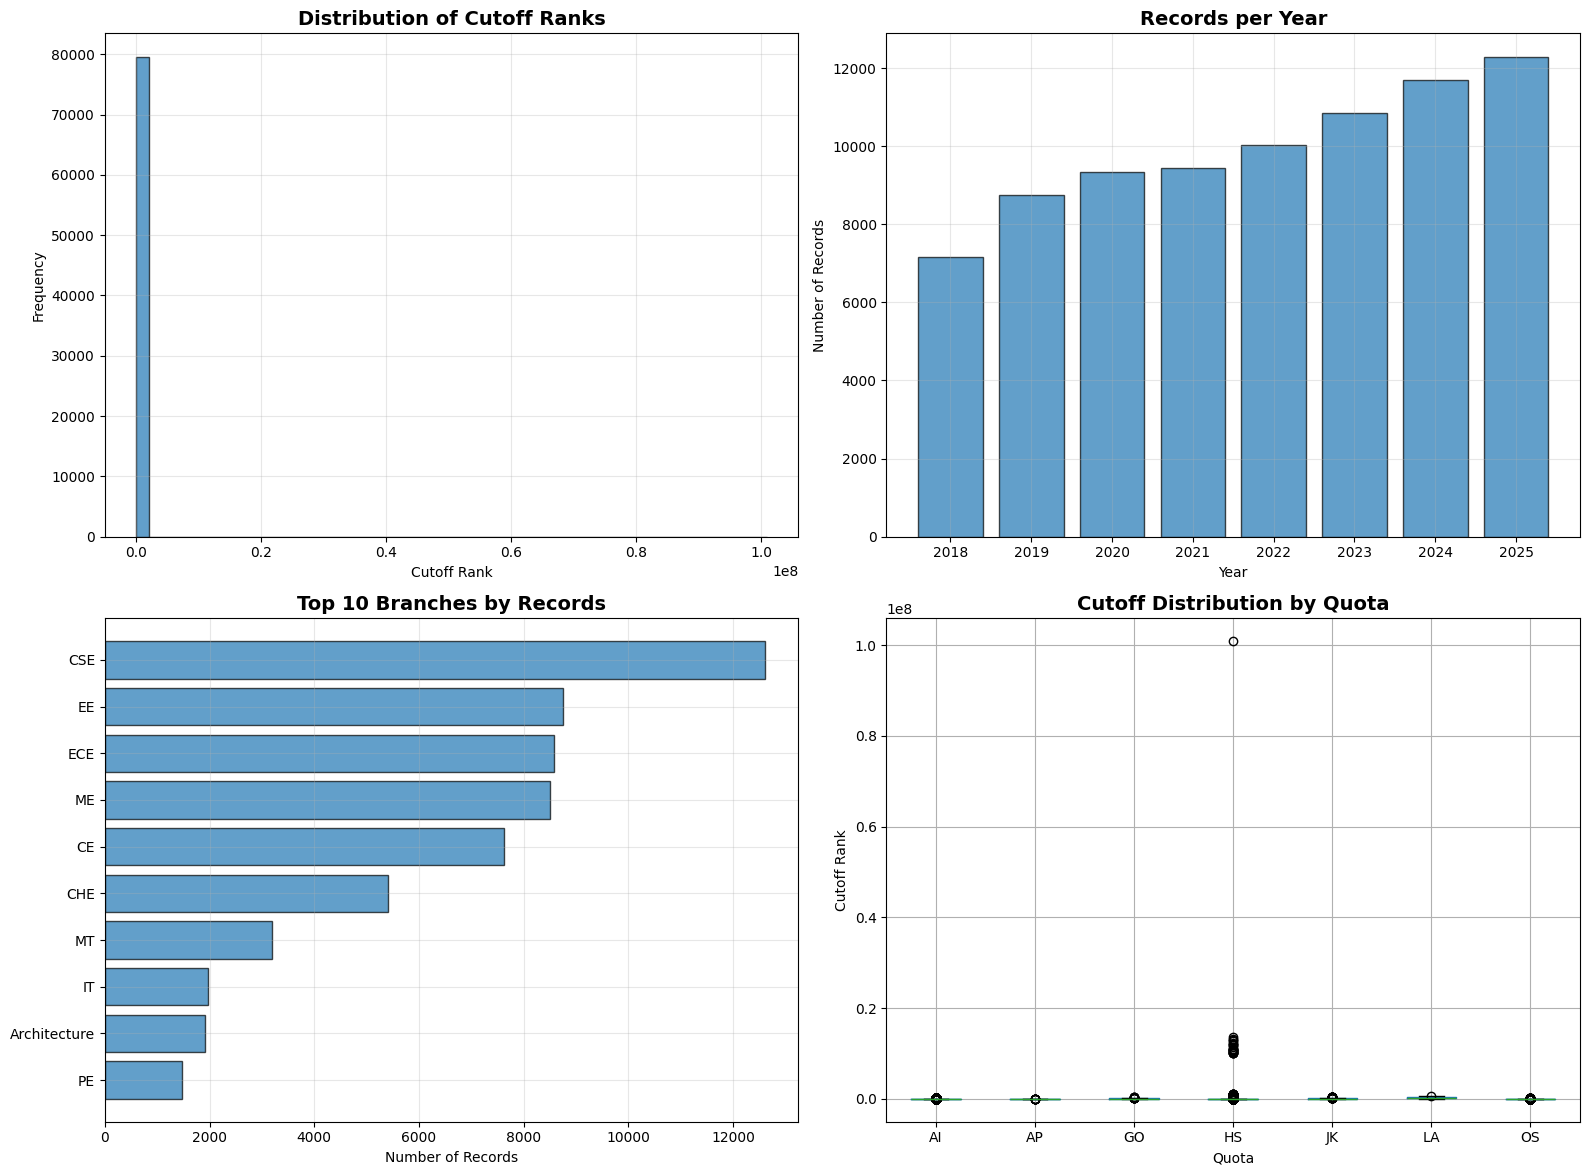

In [18]:
# Visualize cutoff distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cutoff distribution
axes[0, 0].hist(df_cleaned['cutoff'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Cutoff Ranks', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Cutoff Rank')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# 2. Records per year
year_counts = df_cleaned['year'].value_counts().sort_index()
axes[0, 1].bar(year_counts.index, year_counts.values, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Records per Year', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Number of Records')
axes[0, 1].grid(alpha=0.3)

# 3. Top branches
top_branches = df_cleaned['branch'].value_counts().head(10)
axes[1, 0].barh(top_branches.index, top_branches.values, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Top 10 Branches by Records', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Records')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(alpha=0.3)

# 4. Cutoff by quota
df_cleaned.boxplot(column='cutoff', by='quota', ax=axes[1, 1])
axes[1, 1].set_title('Cutoff Distribution by Quota', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Quota')
axes[1, 1].set_ylabel('Cutoff Rank')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

## Step 12: Save Cleaned Data

Save the cleaned dataset for use in model training.

In [19]:
# Save cleaned data
df_cleaned.to_csv('cutoffs_cleaned.csv', index=False)

print("✅ Cleaned data saved successfully!")
print(f"📁 File: cutoffs_cleaned.csv")
print(f"📊 Shape: {df_cleaned.shape[0]} rows × {df_cleaned.shape[1]} columns")

print("\n" + "=" * 80)
print("🎉 DATA CLEANING COMPLETED!")
print("=" * 80)
print("\nCleaned dataset is ready for feature engineering and model training.")
print(f"\nFinal columns: {list(df_cleaned.columns)}")

✅ Cleaned data saved successfully!
📁 File: cutoffs_cleaned.csv
📊 Shape: 79521 rows × 7 columns

🎉 DATA CLEANING COMPLETED!

Cleaned dataset is ready for feature engineering and model training.

Final columns: ['year', 'institute', 'branch', 'quota', 'seat_type', 'gender', 'cutoff']
